In [1]:
import social_interaction
import code_interaction
import buggy_commit
import pandas as pd
import numpy as np
import csv
import platform
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

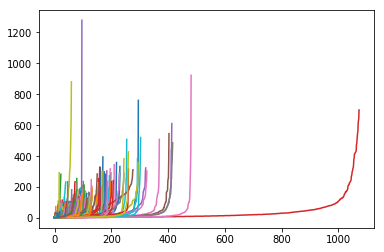

1598 0
270 369 655


In [7]:
#Code
if platform.system() == 'Darwin' or platform.system() == 'Linux':
    _dir = 'Processed Data/'
else:
    _dir = 'Processed Data\\'
Files = [join(_dir, f) for f in listdir(_dir) if isfile(join(_dir, f))]
actual_file = 0
usable_files = 0
size_s = 0
size_m = 0
size_l = 0
result = []
for file in Files:
    try:
        _df = []
        actual_file += 1
        df = pd.read_pickle(file)
        buggy_commit_data_df = df.loc[0,'buggy_commit_data_df']
        commit_data_df = df.loc[0,'commit_data_df']
        commit_count = df.loc[0,'commit_count']
        sg_data_df = df.loc[0,'sg_data_df']
        cg_data_df = df.loc[0,'cg_data_df']
        if commit_data_df.shape[0] > 30:
            size_l += 1
        elif commit_data_df.shape[0] > 15:
            size_m += 1
        elif commit_data_df.shape[0] > 8:
            size_s += 1
        if commit_data_df.shape[0] < 8:
            continue
        for i in range(cg_data_df.shape[0]):
            buggy_commit_count = buggy_commit_data_df[buggy_commit_data_df['committer'] == cg_data_df.loc[i,'committer']]['count']
            if len(buggy_commit_count) == 0:
                continue
            commit_count = commit_data_df[commit_data_df['committer'] == cg_data_df.loc[i,'committer']]['count']
            if len(commit_count) == 0:
                continue
            node_degree = cg_data_df[cg_data_df['committer'] == cg_data_df.loc[i,'committer']]['count']
            #print([buggy_commit_count.values[0],commit_count.values[0],node_degree.values[0]])
            _df.append([buggy_commit_count.values[0]/commit_count.values[0],node_degree.values[0]])
        df = pd.DataFrame(_df, columns = ['per','degree'])
        #print(round(np.median(first_l),2),round(np.median(second_l),2),round(np.median(third_l),2),round(np.median(forth_l),2))
        result.append([file,np.sort(df['degree'].values)])
        plt.plot(np.sort(df['degree'].values))
    except:
        continue
plt.show()
print(actual_file,usable_files)
print(size_s,size_m,size_l)

In [3]:
c_result_df = pd.DataFrame(result, columns = ['project','degree'])

In [ ]:
c_result_df.to_excel('new_results/degree.xlsx')

In [4]:
for i in range(c_result_df.shape[0]):
    plt.plot(sort(c_result_df.iloc[i,1]))
    plt.show()

,project,degree


In [ ]:
#c_result_df.to_excel('new_results/Result_data_team_c.xlsx')